# FSM and Python Coroutines

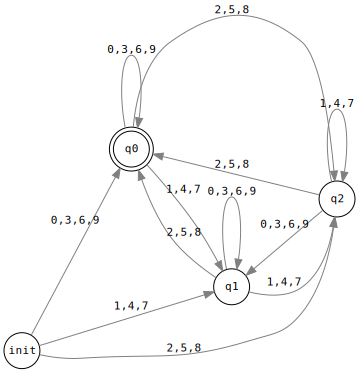

In [1]:
from graphviz import Source
with open("./div3.dot", "r") as f:
    gr = Source(f.read())
gr

In [2]:
from asyncio import coroutine

In [3]:
def state_0():
    global current_state
    while True:
        digit = yield
        if  digit % 3 == 0:
            current_state = s0
        elif digit % 3 == 1:
            current_state = s1
        elif digit % 3 == 2:
            current_state = s2

def state_1():
    global current_state
    while True:
        digit = yield
        if  digit % 3 == 0:
            current_state = s1
        elif digit % 3 == 1:
            current_state = s2
        elif digit % 3 == 2:
            current_state = s0

def state_2():
    global current_state
    while True:
        digit = yield
        if  digit % 3 == 0:
            current_state = s2
        elif digit % 3 == 1:
            current_state = s0
        elif digit % 3 == 2:
            current_state = s1

def state_init():
    global current_state
    while True:
        digit = yield
        if  digit % 3 == 0:
            current_state = s0
        elif digit % 3 == 1:
            current_state = s1
        elif digit % 3 == 2:
            current_state = s2

In [4]:
s_init = state_init()
s0 = state_0()
s1 = state_1()
s2 = state_2()

s_init.send(None)
s0.send(None)
s1.send(None)
s2.send(None)

In [5]:
current_state = s_init
final_state = s0

In [6]:
@coroutine
def evalator():
    digit = 0
    while True:
        digit = yield
        current_state.send(digit)

In [7]:
e = evalator()
number = ""

In [8]:
import random

e = evalator()
e.send(None)
for i in range(10):
    digit = random.randint(0, 9)
    e.send(digit)
    number = str(digit) + number
    print(number, current_state == final_state)

3 True
83 False
783 True
4783 False
44783 False
144783 True
6144783 True
46144783 False
646144783 False
4646144783 False
